## Linear Regression

### Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
#variable and this is a function for uploading the dataset
dataset = pd.read_csv('housing.csv') 

In [3]:
dataset.head() #display 5 rows of dataset

#10,000 rows
#data points collected from a combined cycle power plant over six years
#5 columns: AT ambient temp,V exhaust vacuum, AP ambient pressure, RH relative humdity, PE net hourly  electrical energy output
# independent variables: AT, V, AP and RH
# dependent variable: PE

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


In [4]:
# [rows,columns]
X= dataset.iloc[:,:-2].values
X

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  3.2200e+02,
         1.2600e+02,  8.3252e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  2.4010e+03,
         1.1380e+03,  8.3014e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  4.9600e+02,
         1.7700e+02,  7.2574e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  1.0070e+03,
         4.3300e+02,  1.7000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  7.4100e+02,
         3.4900e+02,  1.8672e+00],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  1.3870e+03,
         5.3000e+02,  2.3886e+00]])

In [5]:
y = dataset.iloc[:,-2].values
y

array([452600, 358500, 352100, ...,  92300,  84700,  89400])

### Creating the Training Set and the Test Set

In [6]:
# scikitlearn is a library
# model_selection is a module
# train_test_split is a function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state=1)

In [7]:
X_train

array([[-1.2225e+02,  3.7860e+01,  4.8000e+01, ...,  1.6560e+03,
         4.5900e+02,  3.0417e+00],
       [-1.1973e+02,  3.6760e+01,  3.0000e+01, ...,  8.8600e+02,
         3.1100e+02,  3.1000e+00],
       [-1.2219e+02,  3.8130e+01,  5.0000e+00, ...,  4.3610e+03,
         1.3950e+03,  4.9504e+00],
       ...,
       [-1.1845e+02,  3.4080e+01,  5.2000e+01, ...,  3.8400e+02,
         1.4500e+02,  7.1576e+00],
       [-1.1697e+02,  3.3940e+01,  2.9000e+01, ...,  1.7220e+03,
         6.0300e+02,  3.0432e+00],
       [-1.2220e+02,  3.7790e+01,  3.5000e+01, ...,  1.0090e+03,
         3.9000e+02,  2.3036e+00]])

In [8]:
X_test

array([[-118.18  ,   34.14  ,   38.    , ..., 1131.    ,  465.    ,
           7.7116],
       [-118.19  ,   34.14  ,   38.    , ...,  793.    ,  297.    ,
           5.2962],
       [-117.25  ,   33.2   ,   10.    , ..., 1302.    ,  471.    ,
           2.7961],
       ...,
       [-123.71  ,   39.88  ,   42.    , ...,  656.    ,  303.    ,
           1.4952],
       [-122.18  ,   37.44  ,   44.    , ...,  948.    ,  346.    ,
           8.2436],
       [-118.58  ,   34.2   ,   35.    , ...,  793.    ,  249.    ,
           5.1463]])

In [9]:
y_train

array([489600,  71300, 214800, ..., 500001,  91200, 126000])

In [10]:
y_test

array([360900, 291500, 131300, ...,  69800, 500001, 220200])

## Part 2 - Building and training the model

### Building the model


In [11]:
# linear_model is the module
# `LinearRegression is a class` is defining that `LinearRegression` is a class within the `linear_model` module. It indicates that `LinearRegression` is a blueprint or template for creating objects that represent linear regression models.
# Class is a pre-coded blueprint of something we want to build from which objects are created.
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Training the Model


In [12]:
# fit is a method inside LinearRegression class - they are like functions.
model.fit(X_train, y_train)


LinearRegression()

### Inference


In [13]:
y_pred = model.predict(X_test)
y_pred

array([377391.41409713, 274015.85270736, 147032.98093885, ...,
       134782.92330107, 428717.35100963, 274864.76957777])

### Making the prediction of a single data point with Longitude = -122.23, Latitude = 37.84, Housing Median Age = 50, Total rooms = 2515, Total Bedrooms = 399 , Populations = 970, Households = 373, Median Income = 5.8596

In [14]:
model.predict([[-122.23,37.84,50,2515,399,970,373,5.8596]])


array([328762.40863456])

## Part 3: Evaluating the Model

### R-Squared

In [15]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.6453289503252078

### Adjusted R-Squared

In [16]:
k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.6446331758285431

# Summary

## Variable Importance Based on Individual R2

# Linear Regression Model Graph of Training Variables

* Relationship between x_train and y_train

* visual representation of the:
    * `python model = LinearRegression() model.fit(X_train, y_train)`
    * Linear regression model between each independent variable with relation to dependent variable.
    


## Longitude

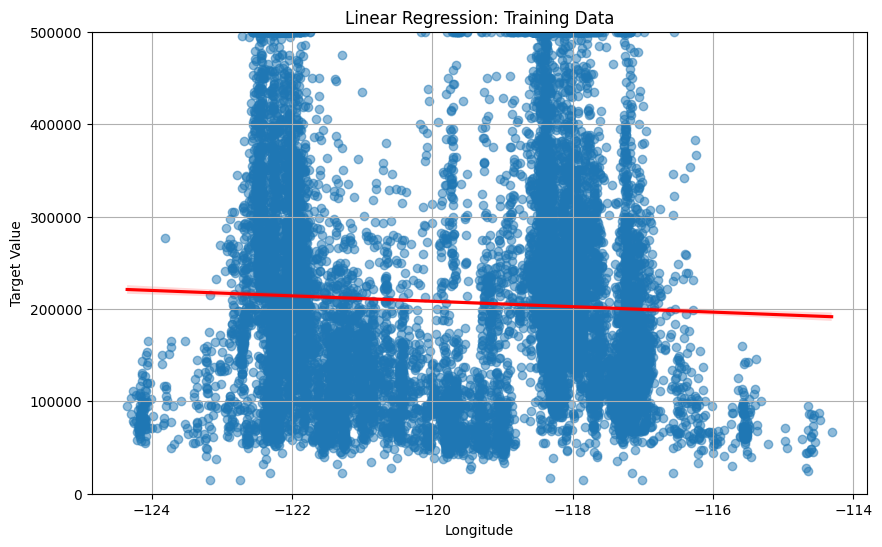

In [17]:


# Plotting the linear regression
feature_index = 0  # Change this index to visualize other features
X_feature_train = X_train[:, feature_index]

# Create the plot
plt.figure(figsize=(10, 6))
sns.regplot(x=X_feature_train, y=y_train, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Longitude')  # Label for the chosen feature
plt.ylabel('Target Value')  # Label for the target variable
plt.title('Linear Regression: Training Data')  # Title for the plot
plt.grid()

# Set y-axis limit
plt.ylim(0, 500000)  # Set y-axis limit from 0 to 500,000

plt.show()


## Latitude

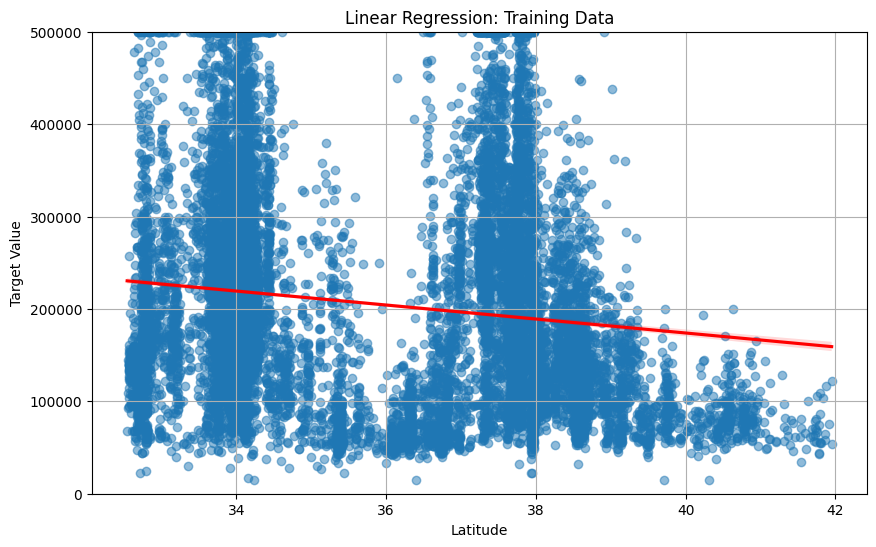

In [ ]:

# Plotting the linear regression
feature_index = 1  # Change this index to visualize other features
X_feature_train = X_train[:, feature_index]

# Create the plot
plt.figure(figsize=(10, 6))
sns.regplot(x=X_feature_train, y=y_train, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel("Latitude")  # Label for the chosen feature
plt.ylabel('Target Value')  # Label for the target variable
plt.title('Linear Regression: Training Data')  # Title for the plot
plt.grid()

# Set y-axis limit
plt.ylim(0, 500000)  # Set y-axis limit from 0 to 500,000

plt.show()

## Housing Median Age

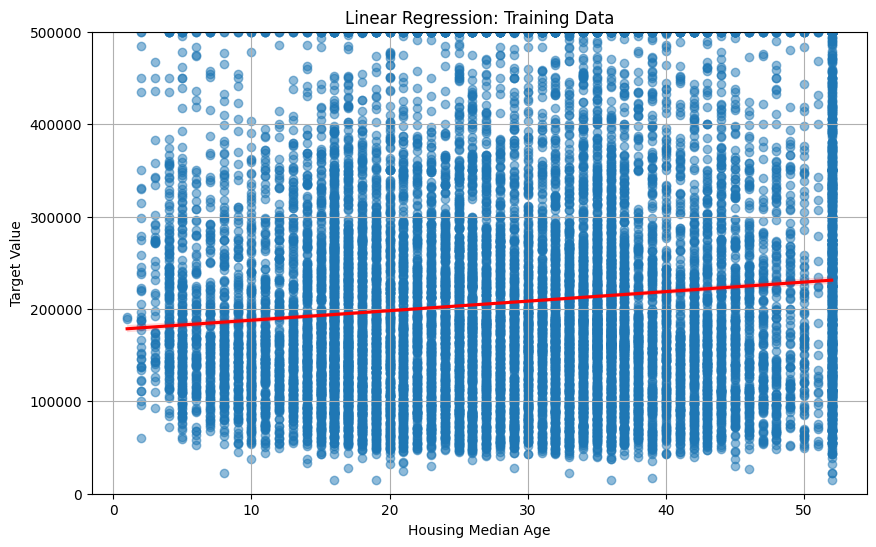

In [19]:

# Plotting the linear regression
feature_index = 2  # Change this index to visualize other features
X_feature_train = X_train[:, feature_index]

# Create the plot
plt.figure(figsize=(10, 6))
sns.regplot(x=X_feature_train, y=y_train, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel("Housing Median Age")  # Label for the chosen feature
plt.ylabel('Target Value')  # Label for the target variable
plt.title('Linear Regression: Training Data')  # Title for the plot
plt.grid()

# Set y-axis limit
plt.ylim(0, 500000)  # Set y-axis limit from 0 to 500,000

plt.show()

## Total Rooms

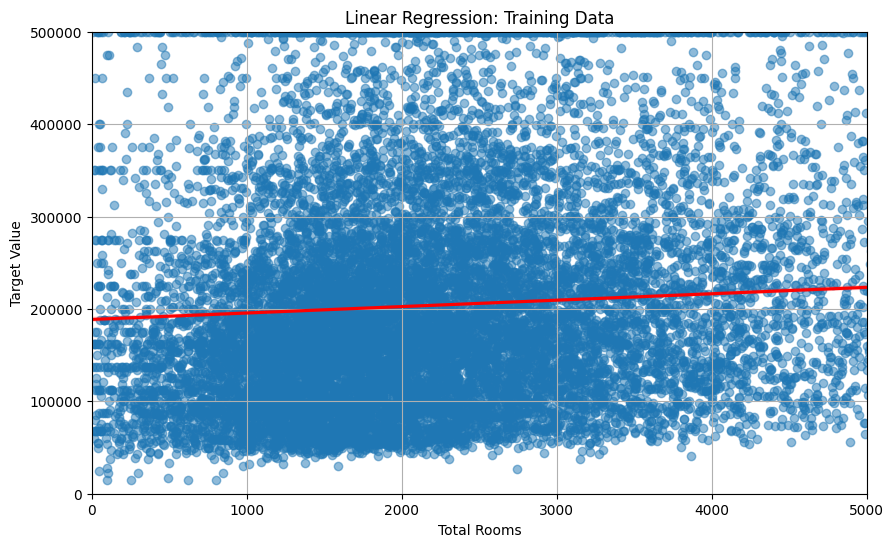

In [33]:

# Plotting the linear regression
feature_index = 3  # Change this index to visualize other features
X_feature_train = X_train[:, feature_index]

# Create the plot
plt.figure(figsize=(10, 6))
sns.regplot(x=X_feature_train, y=y_train, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel("Total Rooms")  # Label for the chosen feature
plt.ylabel('Target Value')  # Label for the target variable
plt.title('Linear Regression: Training Data')  # Title for the plot
plt.grid()

# Set y-axis limit
plt.ylim(0, 500000)  # Set y-axis limit from 0 to 500,000
plt.xlim(0,5000)
plt.show()

## Total Bedrooms

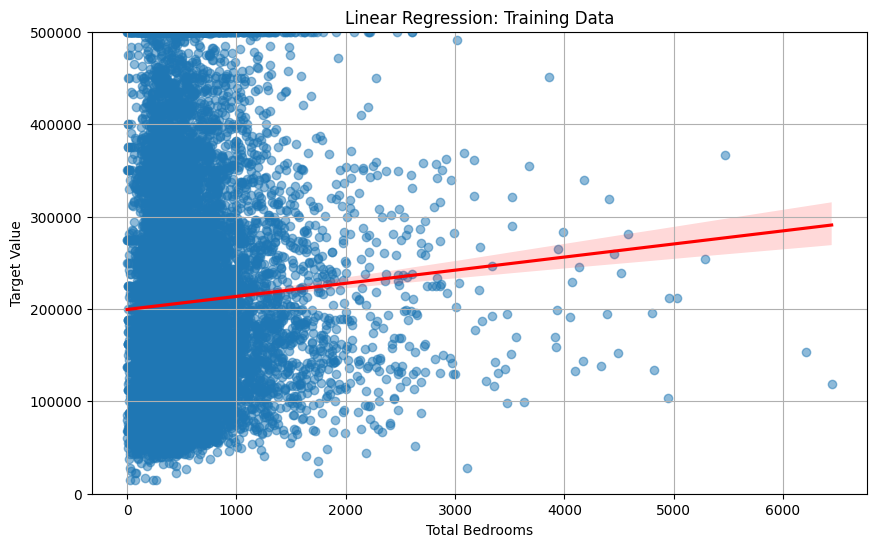

In [ ]:
# Plotting the linear regression
feature_index = 4  # Change this index to visualize other features
X_feature_train = X_train[:, feature_index]

# Create the plot
plt.figure(figsize=(10, 6))
sns.regplot(x=X_feature_train, y=y_train, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel("Total Bedrooms")  # Label for the chosen feature
plt.ylabel('Target Value')  # Label for the target variable
plt.title('Linear Regression: Training Data')  # Title for the plot
plt.grid()

# Set y-axis limit
plt.ylim(0, 500000)  # Set y-axis limit from 0 to 500,000
plt.xlim(0,5000)
plt.show()

## Population

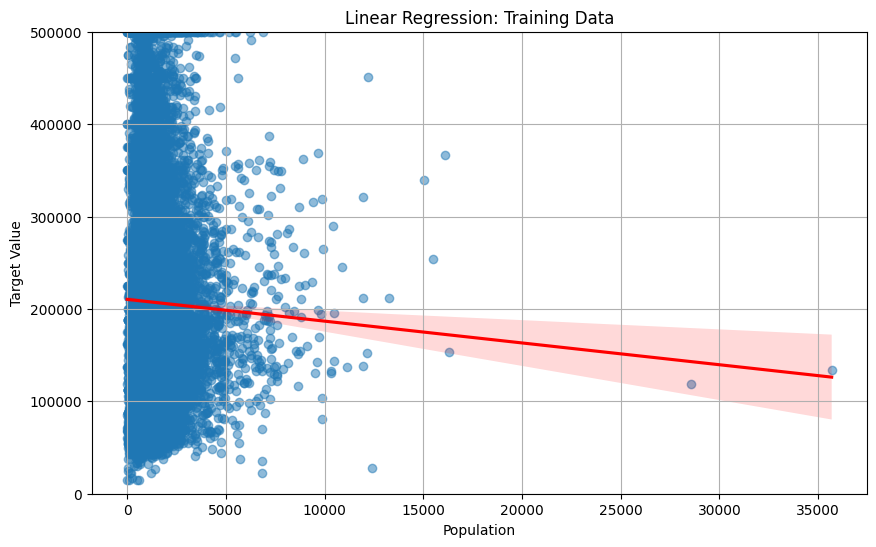

In [22]:
# Plotting the linear regression
feature_index = 5  # Change this index to visualize other features
X_feature_train = X_train[:, feature_index]

# Create the plot
plt.figure(figsize=(10, 6))
sns.regplot(x=X_feature_train, y=y_train, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel("Population")  # Label for the chosen feature
plt.ylabel('Target Value')  # Label for the target variable
plt.title('Linear Regression: Training Data')  # Title for the plot
plt.grid()

# Set y-axis limit
plt.ylim(0, 500000)  # Set y-axis limit from 0 to 500,000

plt.show()

## HouseHolds

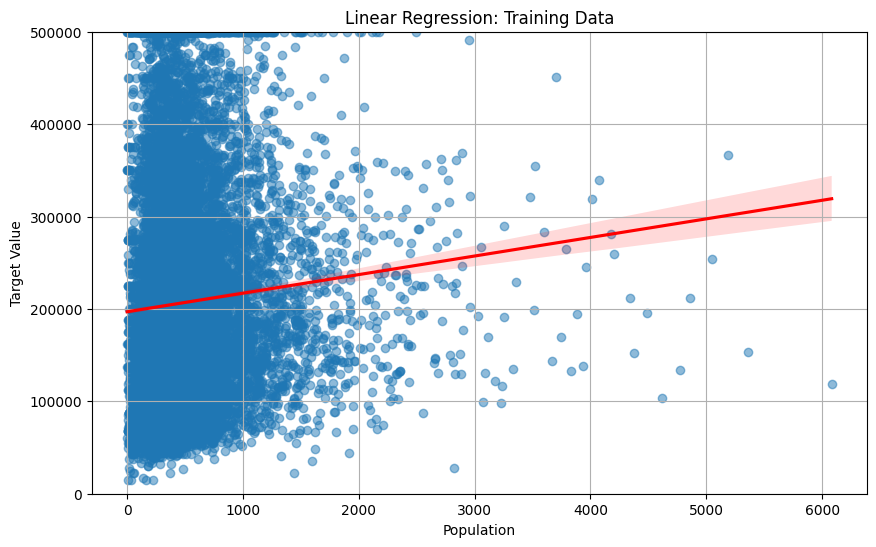

In [23]:
# Plotting the linear regression
feature_index = 6  # Change this index to visualize other features
X_feature_train = X_train[:, feature_index]

# Create the plot
plt.figure(figsize=(10, 6))
sns.regplot(x=X_feature_train, y=y_train, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel("Population")  # Label for the chosen feature
plt.ylabel('Target Value')  # Label for the target variable
plt.title('Linear Regression: Training Data')  # Title for the plot
plt.grid()

# Set y-axis limit
plt.ylim(0, 500000)  # Set y-axis limit from 0 to 500,000

plt.show()

## Median Income

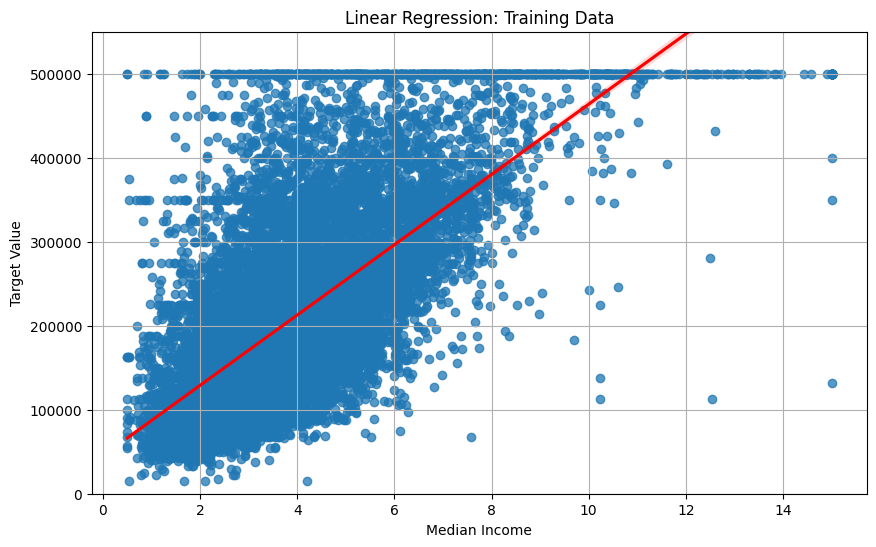

In [32]:
# Plotting the linear regression
feature_index = 7  # Change this index to visualize other features
X_feature_test = X_train[:, feature_index]

# Create the plot
plt.figure(figsize=(10, 6))
sns.regplot(x=X_feature_test, y=y_train, scatter_kws={'alpha': 0.75}, line_kws={'color': 'red'})
plt.xlabel("Median Income")  # Label for the chosen feature
plt.ylabel('Target Value')  # Label for the target variable
plt.title('Linear Regression: Training Data')  # Title for the plot
plt.grid()

# Set y-axis limit
plt.ylim(0, 550000)  # Set y-axis limit from 0 to 500,000

plt.show()

# Linear Regression Model Graph of Training Variables

# Training vs Testing Linear

* y_train vs y_test 
* y_train = blue
* y_test = orange

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880             129   
1    -122.22     37.86                  21         7099            1106   
2    -122.24     37.85                  52         1467             190   
3    -122.25     37.85                  52         1274             235   
4    -122.25     37.85                  52         1627             280   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  
R-squared: 0.6453289503252078
Adjusted R-squared: 0.6446331758285431


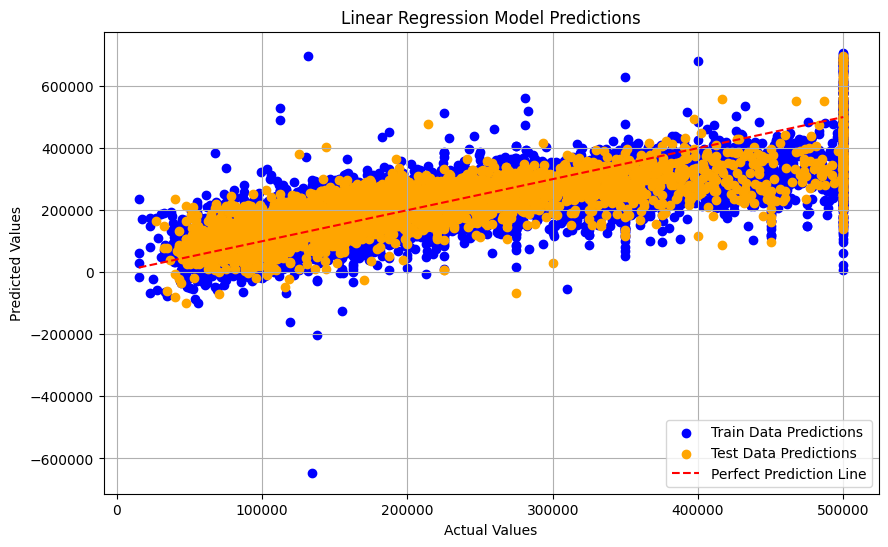

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
dataset = pd.read_csv('housing.csv') 

# Display the first 5 rows of the dataset
print(dataset.head()) 

# [rows, columns]
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values for the test set
y_pred = model.predict(X_test)

# Calculate R-squared and adjusted R-squared
r2 = r2_score(y_test, y_pred)
k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Print R-squared and adjusted R-squared
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)

# Create a scatter plot for training data and regression line
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(y_train, model.predict(X_train), color='blue', label='Train Data Predictions')

# Plot testing data
plt.scatter(y_test, y_pred, color='orange', label='Test Data Predictions')

# Plotting the regression line
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Perfect Prediction Line')

# Labeling the graph
plt.title('Linear Regression Model Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Show the plot
plt.show()


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880             129   
1    -122.22     37.86                  21         7099            1106   
2    -122.24     37.85                  52         1467             190   
3    -122.25     37.85                  52         1274             235   
4    -122.25     37.85                  52         1627             280   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  
Sample Prediction: [328762.40863456]
R^2 Score: 0.6453289503252078
Adjusted

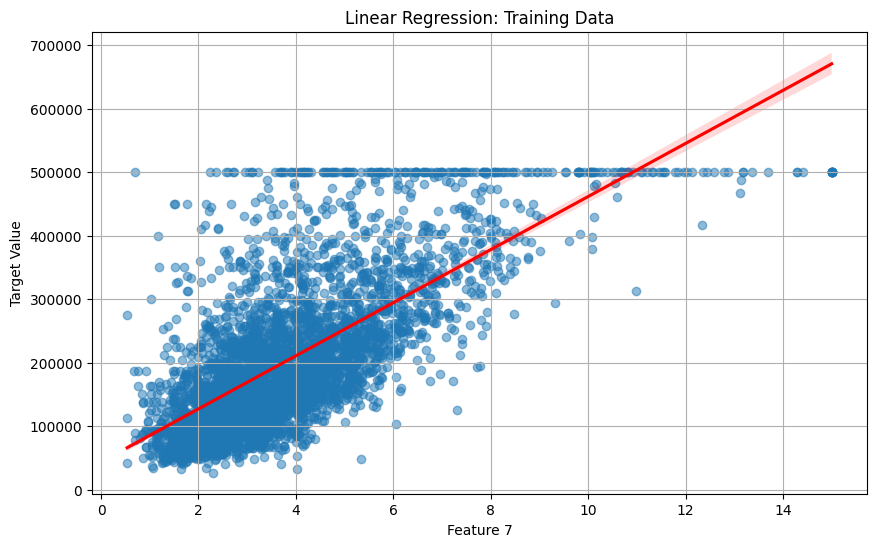

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variable and this is a function for uploading the dataset
dataset = pd.read_csv('housing.csv') 

# Display 5 rows of dataset
print(dataset.head())

# [rows, columns]
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a DataFrame for the training data
train_data = pd.DataFrame(X_train, columns=[f'Feature_{i}' for i in range(X_train.shape[1])])
train_data['Target'] = y_train

# Fit the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Predict a new sample
sample_prediction = model.predict([[-122.23, 37.84, 50, 2515, 399, 970, 373, 5.8596]])
print("Sample Prediction:", sample_prediction)

# Calculate R^2 and adjusted R^2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R^2 Score:", adj_r2)

# Plotting the linear regression
feature_index = 7  # Change this index to visualize other features
X_feature_test = X_test[:, feature_index]

# Create the plot
plt.figure(figsize=(10, 6))
sns.regplot(x=X_feature_test, y=y_test, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel(f'Feature {feature_index}')  # Label for the chosen feature
plt.ylabel('Target Value')  # Label for the target variable
plt.title('Linear Regression: Training Data')  # Title for the plot
plt.grid()
plt.show()

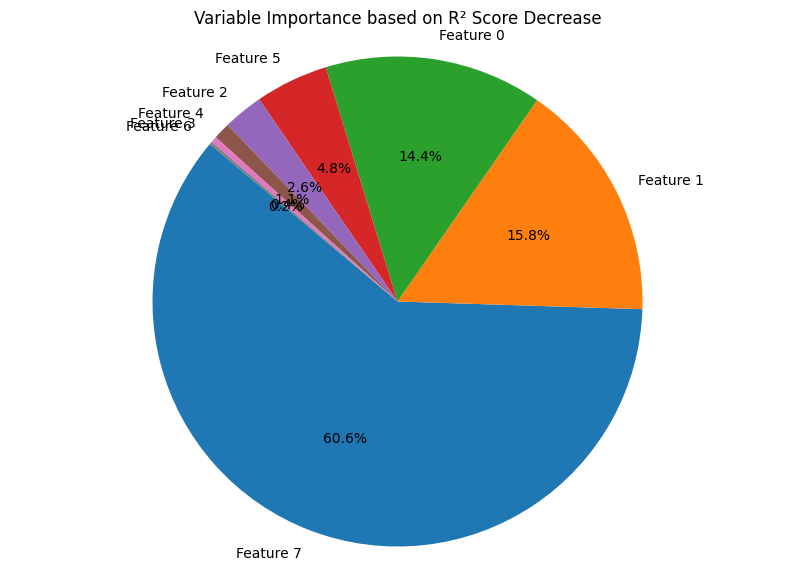

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
dataset = pd.read_csv('housing.csv')

# Prepare the data
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate R^2
y_pred = model.predict(X_test)
r2_full = r2_score(y_test, y_pred)

# Initialize a list to hold variable importance
variable_importance = {}

# Calculate R^2 for each feature
for i in range(X.shape[1]):
    # Remove the i-th feature
    X_train_reduced = np.delete(X_train, i, axis=1)
    X_test_reduced = np.delete(X_test, i, axis=1)
    
    # Train the model without the i-th feature
    model_reduced = LinearRegression()
    model_reduced.fit(X_train_reduced, y_train)
    
    # Predict and calculate R^2
    y_pred_reduced = model_reduced.predict(X_test_reduced)
    r2_reduced = r2_score(y_test, y_pred_reduced)
    
    # Calculate importance as the decrease in R^2
    importance = r2_full - r2_reduced
    variable_importance[f'Feature {i}'] = importance

# Convert to DataFrame for better readability
importance_df = pd.DataFrame(list(variable_importance.items()), columns=['Feature', 'Importance'])
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plotting the variable importance as a pie chart
plt.figure(figsize=(10, 7))
plt.pie(importance_df['Importance'], labels=importance_df['Feature'], autopct='%1.1f%%', startangle=140)
plt.title('Variable Importance based on R² Score Decrease')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Variable Imporatance Based on Individual R-Squared:


              Feature  R² Score
7       Median Income  0.494367
1            Latitude  0.026380
3         Total Rooms  0.017919
2  Housing Median Age  0.005864
6          Households  0.002786
4      Total Bedrooms  0.001304
5          Population  0.000909
0           Longitude -0.000237


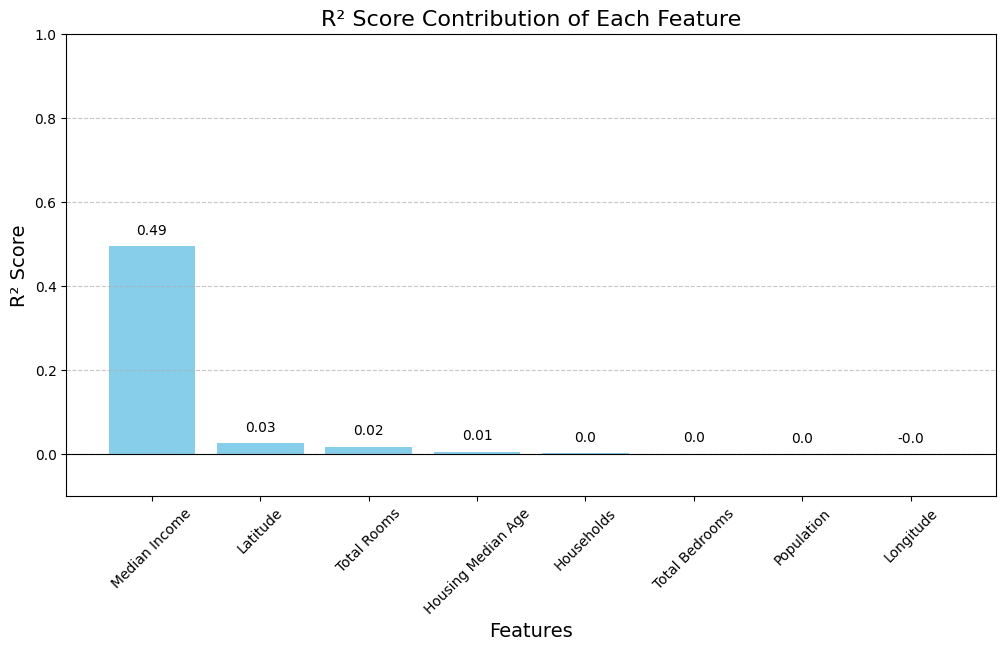

              Feature  R² Score
7       Median Income  0.494367
1            Latitude  0.026380
3         Total Rooms  0.017919
2  Housing Median Age  0.005864
6          Households  0.002786
4      Total Bedrooms  0.001304
5          Population  0.000909
0           Longitude -0.000237


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
dataset = pd.read_csv('housing.csv')

# Prepare the data
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate R² for the full model
y_pred = model.predict(X_test)
r2_full = r2_score(y_test, y_pred)

# Initialize lists to hold R² scores
r2_scores = []

# Calculate R² for each feature separately
for i in range(X.shape[1]):
    # Prepare a dataset with only the i-th feature
    X_train_single = X_train[:, i].reshape(-1, 1)
    X_test_single = X_test[:, i].reshape(-1, 1)
    
    # Train the model using only the i-th feature
    model_single = LinearRegression()
    model_single.fit(X_train_single, y_train)
    
    # Predict and calculate R²
    y_pred_single = model_single.predict(X_test_single)
    r2_single = r2_score(y_test, y_pred_single)
    
    # Store the R² score for the feature
    r2_scores.append(r2_single)

# Convert to DataFrame for better readability
importance_df = pd.DataFrame({'Feature': [f'Feature {i}' for i in range(X.shape[1])], 'R² Score': r2_scores})

# Rename features
importance_df.loc[importance_df['Feature'] == 'Feature 0', 'Feature'] = 'Longitude'
importance_df.loc[importance_df['Feature'] == 'Feature 1', 'Feature'] = 'Latitude'
importance_df.loc[importance_df['Feature'] == 'Feature 2', 'Feature'] = 'Housing Median Age'
importance_df.loc[importance_df['Feature'] == 'Feature 3', 'Feature'] = 'Total Rooms'
importance_df.loc[importance_df['Feature'] == 'Feature 4', 'Feature'] = 'Total Bedrooms'
importance_df.loc[importance_df['Feature'] == 'Feature 5', 'Feature'] = 'Population'
importance_df.loc[importance_df['Feature'] == 'Feature 6', 'Feature'] = 'Households'
importance_df.loc[importance_df['Feature'] == 'Feature 7', 'Feature'] = 'Median Income'

importance_df.sort_values(by='R² Score', ascending=False, inplace=True)

# Check R² scores
print(importance_df)

# Plotting the R² scores as a bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(importance_df['Feature'], importance_df['R² Score'], color='skyblue')

# Set fixed limits for y-axis
plt.ylim(-0.1, 1.0)  # Adjust these limits based on expected R² scores

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

plt.title('R² Score Contribution of Each Feature', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('R² Score', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.axhline(0, color='black', linewidth=0.8)  # Add a horizontal line at y=0
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for easier reading
plt.show()

# Display the R² scores DataFrame
print(importance_df)


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error  # Import mean_squared_error

# Load the dataset
dataset = pd.read_csv('housing.csv') 

# Display the first 5 rows of the dataset
dataset.head()

# Split the data into features (X) and target (y)
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Make a prediction for a specific input
model.predict([[-122.23, 37.84, 50, 2515, 399, 970, 373, 5.8596]])

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R^2
k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_pred, y_test)

# Print the results
print(f'R^2 Score: {r2}')
print(f'Adjusted R^2: {adj_r2}')
print(f'Mean Squared Error: {mse}')


R^2 Score: 0.6453289503252078
Adjusted R^2: 0.6446331758285431
Mean Squared Error: 4716012366.647067


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880             129   
1    -122.22     37.86                  21         7099            1106   
2    -122.24     37.85                  52         1467             190   
3    -122.25     37.85                  52         1274             235   
4    -122.25     37.85                  52         1627             280   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  
R-squared: 0.6453289503252078
Adjusted R-squared: 0.6446331758285431


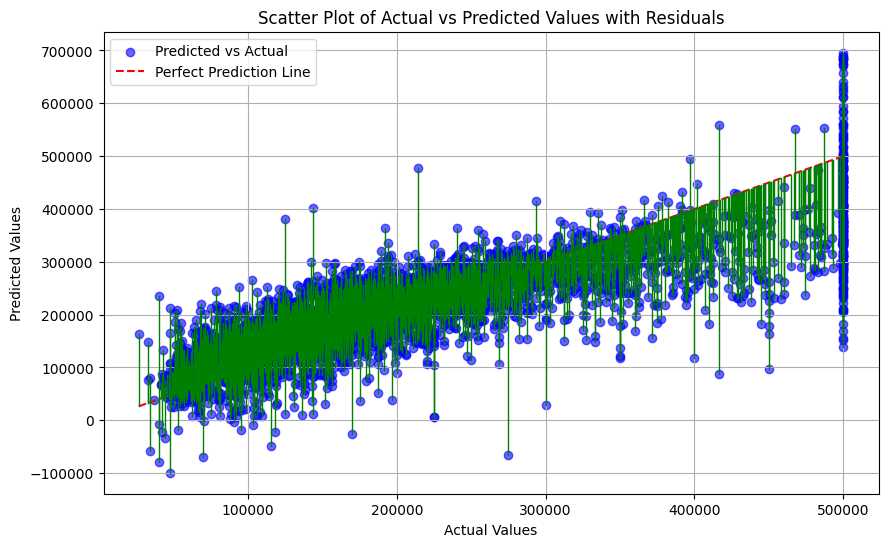

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
dataset = pd.read_csv('housing.csv') 

# Display the first 5 rows of the dataset
print(dataset.head()) 

# [rows, columns]
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values for the test set
y_pred = model.predict(X_test)

# Calculate R-squared and adjusted R-squared
r2 = r2_score(y_test, y_pred)
k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Print R-squared and adjusted R-squared
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)

# Calculate residuals
residuals = y_test - y_pred

# Create a scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Adding a 45-degree line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')

# Plot residuals
for i in range(len(y_test)):
    plt.plot([y_test[i], y_test[i]], [y_pred[i], y_test[i]], color='green', linestyle='-', linewidth=1)

# Labeling the graph
plt.title('Scatter Plot of Actual vs Predicted Values with Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Show the plot
plt.show()


# Actual vs Predicted Outcome

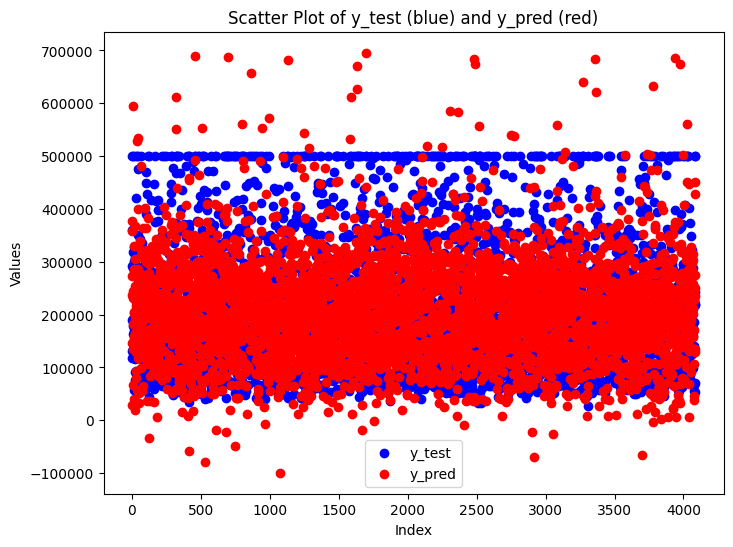

In [31]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
dataset = pd.read_csv('housing.csv')

# Define the input (X) and output (y) variables
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict y values for X_test
y_pred = model.predict(X_test)

# Plot y_test and y_pred
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='y_test')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='y_pred')
plt.title("Scatter Plot of y_test (blue) and y_pred (red)")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.show()
